In [10]:

from pykat import finesse 
       
from pykat.commands import *     
import numpy as np               
import matplotlib.pyplot as plt  
import scipy                     
from IPython import display
              

pykat.init_pykat_plotting(dpi=200)

In [11]:
base1 = """

l L0 10 0 n0                           #input laser 10W

tem L0 0 0 1 0                         #HOM modes m=7
tem L0 1 0 1 0 
tem L0 2 0 1 0 
tem L0 3 0 1 0 
tem L0 4 0 1 0 
tem L0 5 0 1 0 
tem L0 6 0 1 0 
tem L0 7 0 1 0 


s s1 1 n0 n5                            #space between L0 and itm 1m

m itmx0 0 1 0 n5 n6                     #ITM surface 1   R=0,T=1,L=0
s itmx_l 0.035 1.44963 n6 n7            #thickness of mirror 35mm
m itmx 0.990 0.001 0 n7 n8              #ITM surface 2   R=0.990,T=0.001

s s2 9.1 n8 n9                          #cavity length 9.1m

m etmx .998 0.001 0 n9 n10              #ETM surface 2   R=0.998,T=0.001
s etmx_l 0.035 1.44963 n10 n11          #thickness of mirror
m etmx0 0 1 0 n11 n12                   #ETM surface 1   R=0,T=1,L=0

attr etmx Rcx 34                        #initial RoC of ETMx mirror
attr etmx Rcy 34

xaxis etmx Rcx lin 10 70 6000           #change RoC from 10-70


func g = 1-(9.1/$x1)                    #calculate g factor
put etmx Rcy $x1                        #set RoC of etmx


ad order0 0 0 0 n12                     #ad detectors
ad order1 1 0 0 n12
ad order2 2 0 0 n12
ad order3 3 0 0 n12
ad order4 4 0 0 n12
ad order5 5 0 0 n12
ad order6 6 0 0 n12
ad order7 7 0 0 n12



cav FP itmx n8 etmx n9
cp FP x finesse                         #finesse of the cavity

maxtem 7                                # TEM m=7
phase 2

#noplot Rc2
"""

In [12]:
basekat = finesse.kat() 
basekat.verbose = 1
basekat.parse(base1)

out = basekat.run()
out.info()
#out.plot(['FP_x_w'])

Parsing `tem L0 0 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 1 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 2 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 3 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 4 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 5 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 6 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 7 0 1 0` into pykat object not implemented yet, added as extra line.
--------------------------------------------------------------
Running kat - Started at 2021-07-15 19:46:40.285880


100% | ETA:  0:00:00 | Calculating                                             

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 103.344 seconds

--- Output info ---

Run date and time: 2021-07-15 19:46:40.286859
Detectors used: FP_x_finesse, g, order0, order1, order2, order3, order4, order5, order6, order7

One xaxis used: ['xaxis etmx Rcx lin 10 70 6000', 'put etmx Rcy $x1']
order0       : min = 1.860893802395170e-01 max = 1.860893802395170e-01
order1       : min = 5.877744642806840e-04 max = 1.555058518048880e-03
order2       : min = 5.607013547919381e-04 max = 9.796154199425921e-04
order3       : min = 5.607013547919381e-04 max = 1.810741775686230e-01
order4       : min = 5.607013548778600e-04 max = 1.860893802395170e-01
order5       : min = 5.607015728946940e-04 max = 1.860646402488430e-01
order6       : min = 5.607013547919381e-04 max = 1.860893802395170e-01
order7       : min = 5.607013588541060e-04 max = 1.860671476977230e-01
FP_x_finesse : min = 5.213234162156340e+02 max = 5.213234162156340e+02
g            : min = 9.00000

100% | ETA:  0:00:00 | Calculating                                             

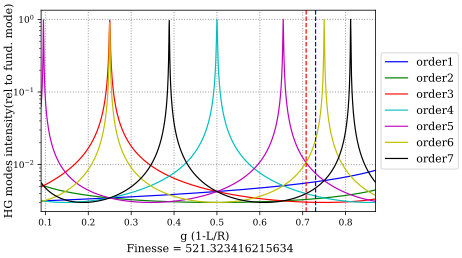

In [13]:
y=[]
x= out['g']
colors = ['b','g','r','c','m','y','k','teal','violet','pink','olive']
#plt.figure(figsize=(8,4))


#append all output detectors in an array
for i in range(0,7,1):
    y.append(out['order'+str(i+1)]/out['order0']) #calculate HOM wrt to TEM00


#plot all outputs
for k in range(0,7,1):
    plt.semilogy(x,y[k],antialiased=False,label='order'+str(k),c=colors[k])  
    
  
#label and other stuff
plt.grid(linewidth=1)
plt.legend(["order1","order2","order3","order4","order5","order6","order7","order8","order9","order10"],loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel("g (1-L/R)  \n Finesse = "+str(out['FP_x_finesse'][1]))
plt.ylabel("HG modes intensity(rel to fund. mode)",verticalalignment='center')

plt.axvline(x = 0.708, color = 'r', linestyle = 'dashed')
plt.axvline(x = 0.73, color = 'b', linestyle = 'dashed')


> Length of the cavity = 9.1m <br>
> Red Dashed Line -  x = 0.708    gives RoC = 31.16m <br>
> Blue Dashed LIne - x = x = 0.73 gives RoC = 34m